<a href="https://colab.research.google.com/github/Aaditya97735/Aaditya97735/blob/main/Telecom_DA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset shape: (7043, 21)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMo

<ipython-input-1-d14581720705>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


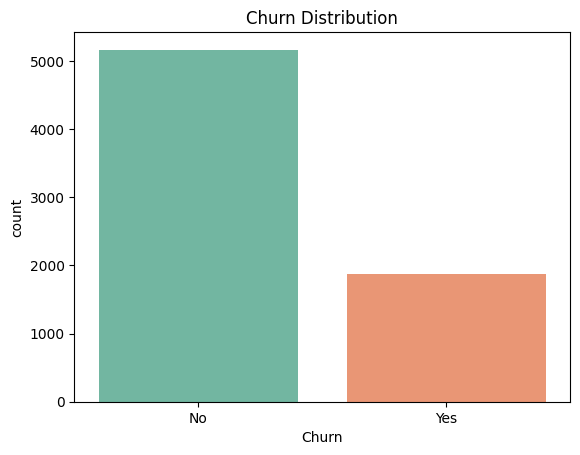

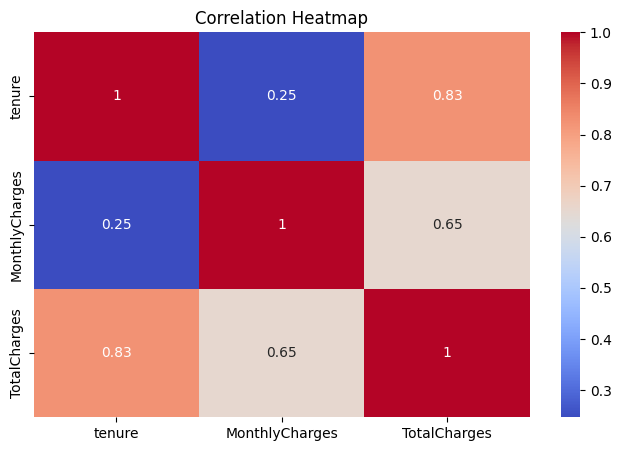

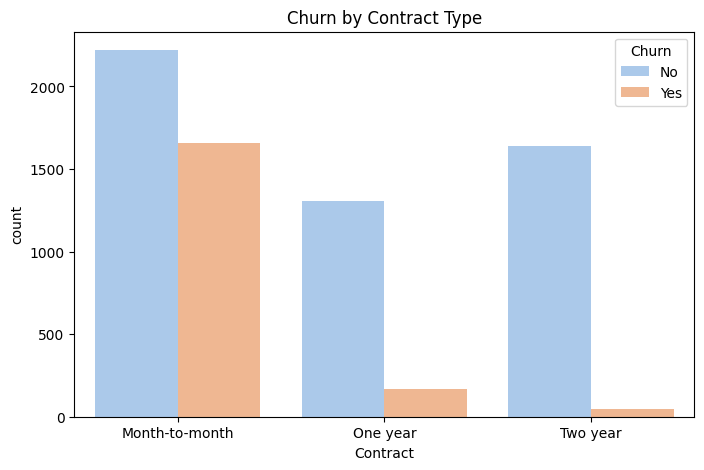

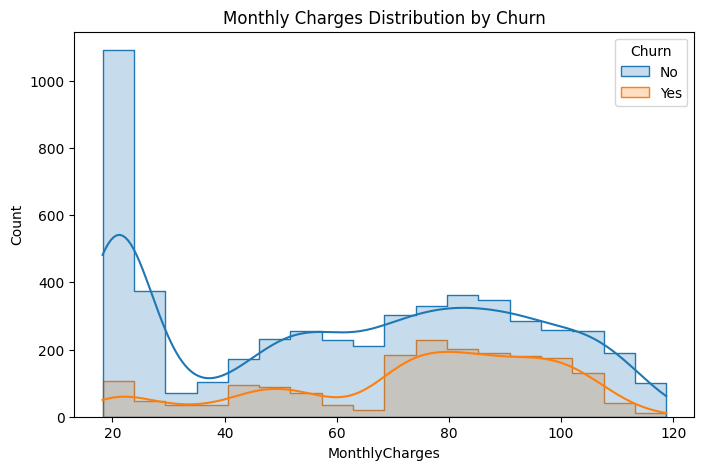

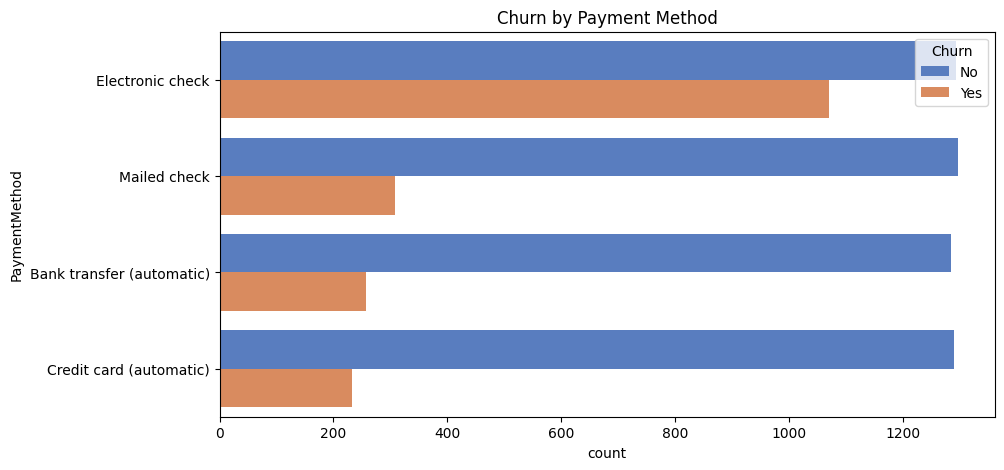

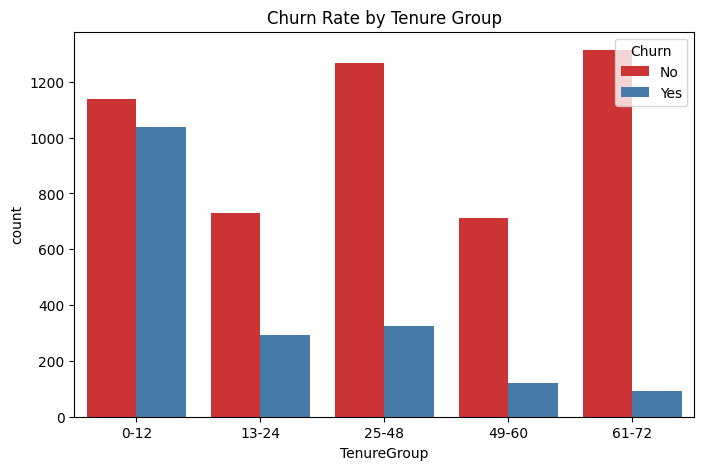

In [ ]:
# Step 1: Upload the file in Google Colab
from google.colab import files
uploaded = files.upload()

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Step 4: Quick overview
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Step 5: Clean the data
# Convert 'TotalCharges' to numeric (some are blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)  # drop rows with NaNs

# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

# Step 6: Churn distribution
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.show()

# Step 7: Correlation heatmap (numerical features only)
numeric_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 8: Visualize Churn by Contract type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.show()

# Step 9: Churn vs Monthly Charges
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element='step')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

# Step 10: Churn by Payment Method
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette='muted')
plt.title('Churn by Payment Method')
plt.show()

# Step 11: Tenure Grouping and Churn
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                           labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TenureGroup', hue='Churn', palette='Set1')
plt.title('Churn Rate by Tenure Group')
plt.show()


In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)
print("Encoded dataset shape:", df_encoded.shape)


Encoded dataset shape: (7032, 35)


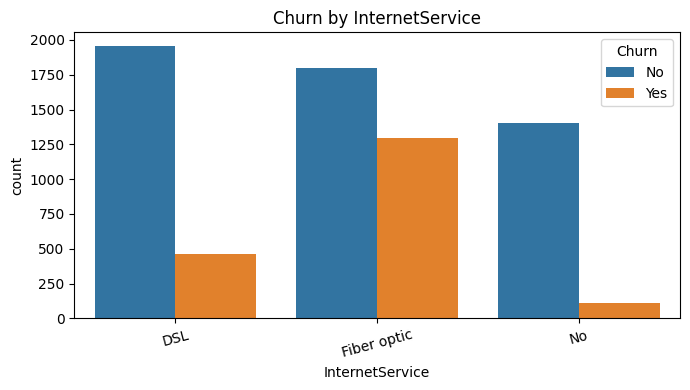

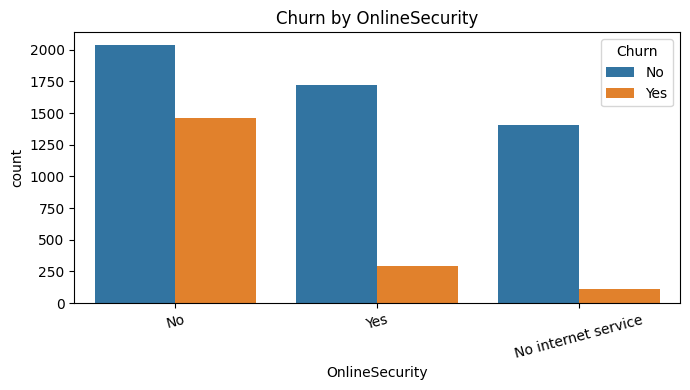

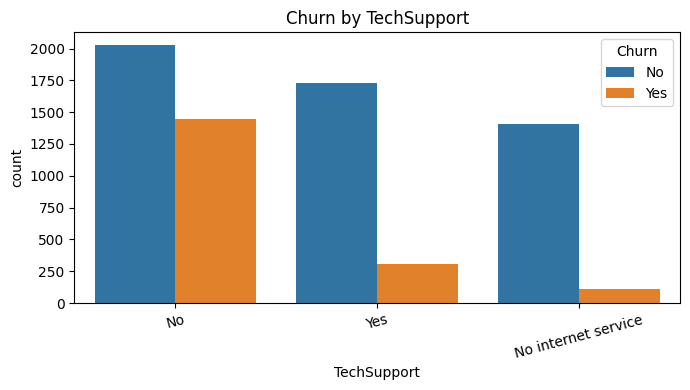

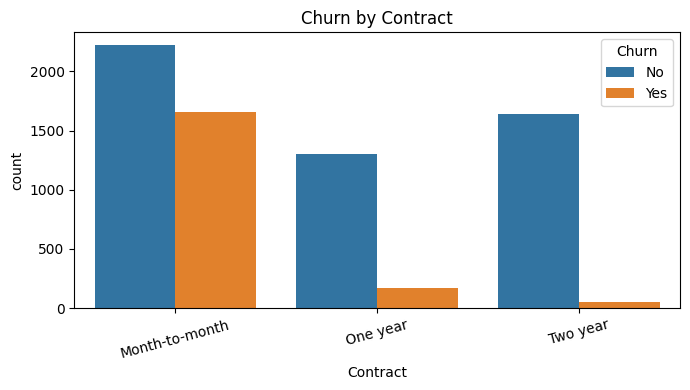

In [ ]:
features_to_check = ['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract']

for feature in features_to_check:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


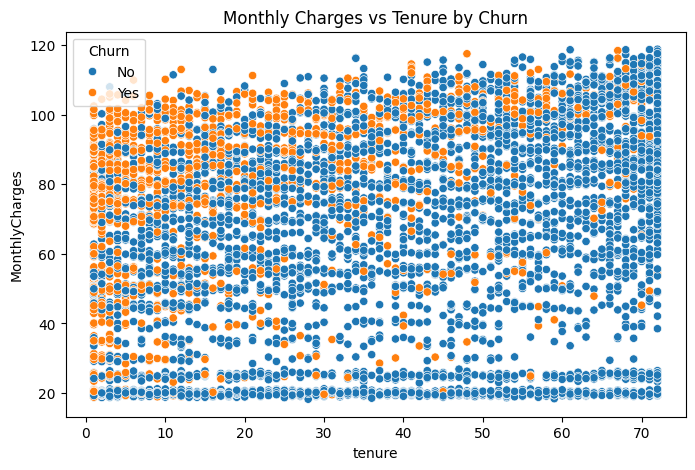

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges vs Tenure by Churn')
plt.show()


Confusion Matrix:
 [[930 103]
 [195 179]]

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


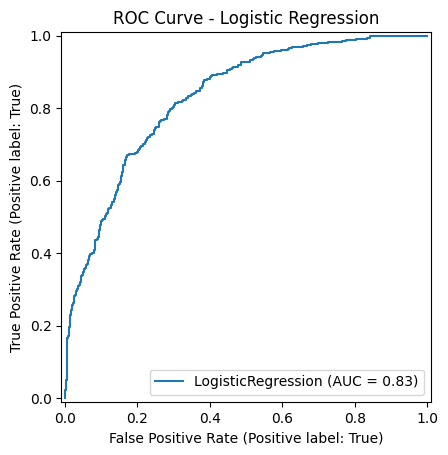

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Prepare data
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()



Random Forest Report:
               precision    recall  f1-score   support

       False       0.82      0.89      0.86      1033
        True       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



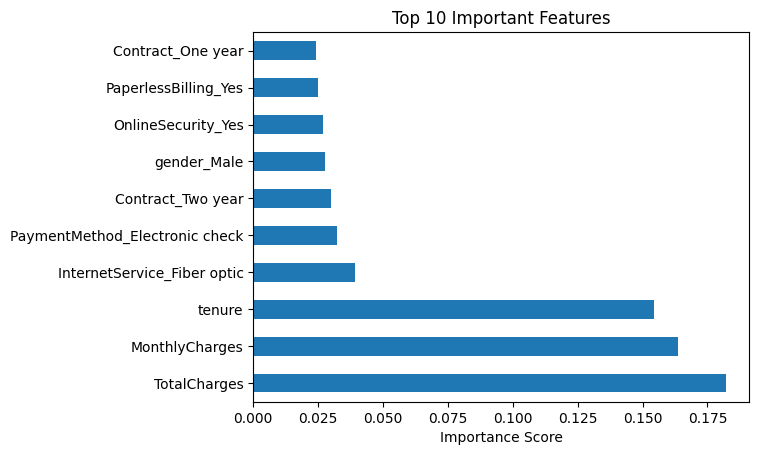

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

# Plot Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title="Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()


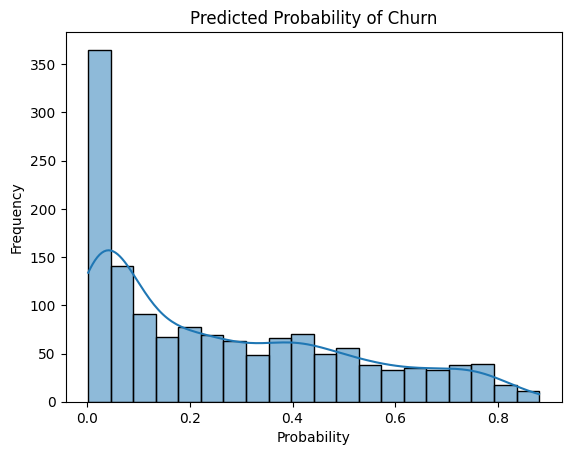

In [ ]:
# Show distribution of predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]
sns.histplot(y_probs, bins=20, kde=True)
plt.title("Predicted Probability of Churn")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


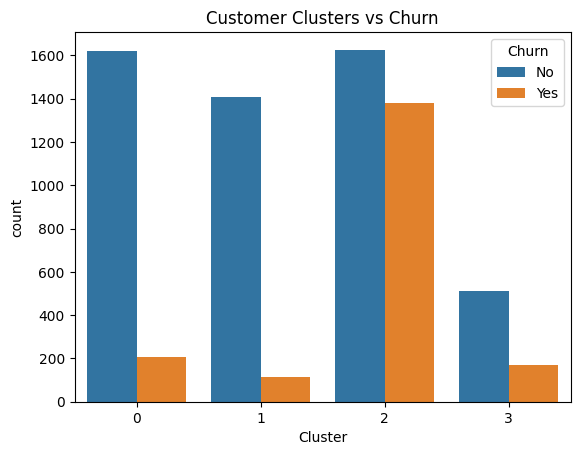

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
sns.countplot(x='Cluster', hue='Churn', data=df)
plt.title("Customer Clusters vs Churn")
plt.show()


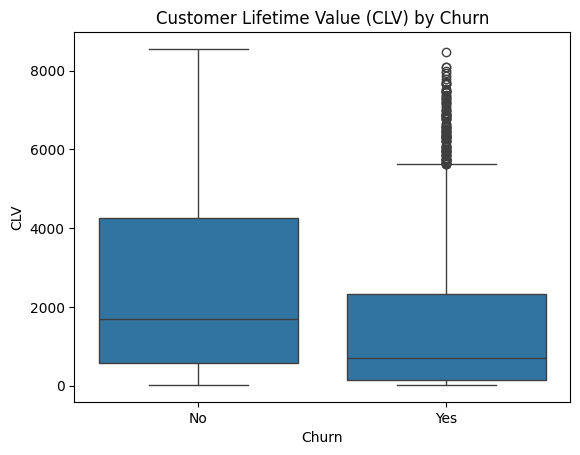

In [ ]:
# Customer lifetime value approximation
df['CLV'] = df['tenure'] * df['MonthlyCharges']
sns.boxplot(x='Churn', y='CLV', data=df)
plt.title("Customer Lifetime Value (CLV) by Churn")
plt.show()
